<a href="https://colab.research.google.com/github/lalitdadhich/-LGMVIP-DataScience/blob/master/Advance_Task1_LGMVIPAUG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Science Intern @ LetsGrowMore**
##**Author :Lalit Dadhich**
##**Advance Level 03**
**1)Develop A Neural Network That Can Read Handwriting:
Begin your neural network machine learning project with the MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN. It has a very user-friendly interface that’s ideal for beginners. Dataset can be seen on MNIST or can find here**

In [22]:
!pip install tensorflow

**Importing Required Libraries**

In [23]:
import tensorflow as tf
from numpy import unique, argmax
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

**Load the Dataset**

In [24]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

**Reshaping the trainning and testing dataset**

In [25]:
x_train =x_train.reshape((x_train.shape[0] ,x_train.shape[1], x_train.shape[2],1))
x_test =x_test.reshape((x_test.shape[0] ,x_test.shape[1], x_test.shape[2],1))

**Normalize the value of pixels in images**

In [26]:
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

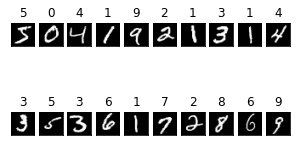

In [27]:
fig=plt.figure(figsize=(5,3))
for i in range(20):
  ax =fig.add_subplot(2,10,i+1 ,xticks=[] ,yticks=[])
  ax.imshow(np.squeeze(x_train[i]), cmap='gray')
  ax.set_title(y_train[i])

**Determine the shape of input image**

In [28]:
img_shape= x_train.shape[1:]
img_shape

(28, 28, 1)

**Defining the model**

In [29]:
import tensorflow as tf


model = tf.keras.models.Sequential([

  tf.keras.layers.Flatten(input_shape=(28, 28)),

  tf.keras.layers.Dense(128, activation='relu'),

  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Dense(10)

])

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


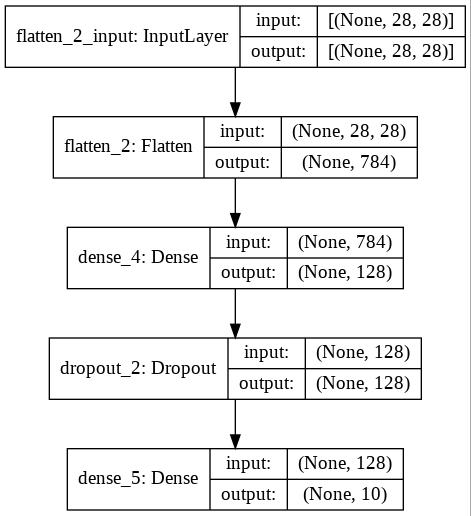

In [31]:
from tensorflow.keras.utils import plot_model

plot_model(model, 'model.jpg', show_shapes=True)

In [32]:
predictions = model(x_train[:1]).numpy()

predictions

array([[ 0.3365453 , -0.42647445, -0.00888481,  0.04547439,  0.13566436,
        -0.51837254,  0.4460126 , -0.32891476, -0.5330289 ,  0.49542663]],
      dtype=float32)

In [33]:
tf.nn.softmax(predictions).numpy()

array([[0.13539106, 0.06312693, 0.09584547, 0.10119975, 0.11075122,
        0.05758427, 0.15105358, 0.06959601, 0.05674645, 0.15870523]],
      dtype=float32)

**Compling The Model**

In [34]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()
model.compile(optimizer='adam',loss=loss_fn, metrics=['accuracy'])

**Train the model**

In [35]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2994 - accuracy: 0.9139
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1416 - accuracy: 0.9583
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1072 - accuracy: 0.9670
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0863 - accuracy: 0.9736
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0707 - accuracy: 0.9775


**Model Evaluation**

In [36]:
model.evaluate(x_test,  y_test, verbose=5)

[0.07443836331367493, 0.9779999852180481]

**Probablity of the model**

In [37]:
probability_model = tf.keras.Sequential([ model, tf.keras.layers.Softmax() ])
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.09282695e-07, 8.18443979e-09, 2.06928944e-05, 4.67721438e-05,
        5.56485580e-10, 7.51002318e-08, 2.22371709e-12, 9.99930978e-01,
        1.08963000e-07, 1.18886248e-06],
       [1.03727793e-07, 4.18237178e-05, 9.99955654e-01, 2.39290557e-06,
        3.40950709e-15, 3.49691724e-08, 7.04309333e-10, 5.24220458e-14,
        3.61646979e-09, 1.03224788e-13],
       [6.31320276e-08, 9.99400854e-01, 5.66970957e-05, 2.83100485e-06,
        8.14779851e-05, 6.97350231e-07, 5.84478630e-06, 4.14998125e-04,
        3.62330575e-05, 2.92486902e-07],
       [9.97382343e-01, 3.17072435e-09, 1.09915901e-03, 5.50838013e-06,
        5.26574604e-06, 3.14388744e-05, 1.46936520e-03, 6.64773415e-06,
        5.24503143e-08, 1.70185217e-07],
       [3.92701577e-06, 5.78292658e-09, 8.39567438e-05, 1.56290625e-07,
        9.47714329e-01, 3.96539463e-06, 4.14701981e-06, 1.46841840e-03,
        1.47047061e-07, 5.07209115e-02]], dtype=float32)>

**Testing the model**

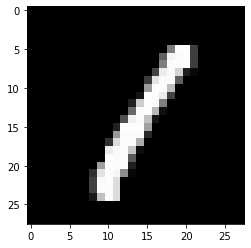

In [38]:
img = x_train[3]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

In [39]:
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted : {}".format(argmax(p)))

predicted : 1


##**Thank You @ LetsGrowMore**